In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import pandas as pd
import numpy as np
import random
import math
import sklearn
import scipy as sp
import networkx
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
from causalgraphicalmodels import CausalGraphicalModel

### MONEY MARKET AND THE LM CURVE

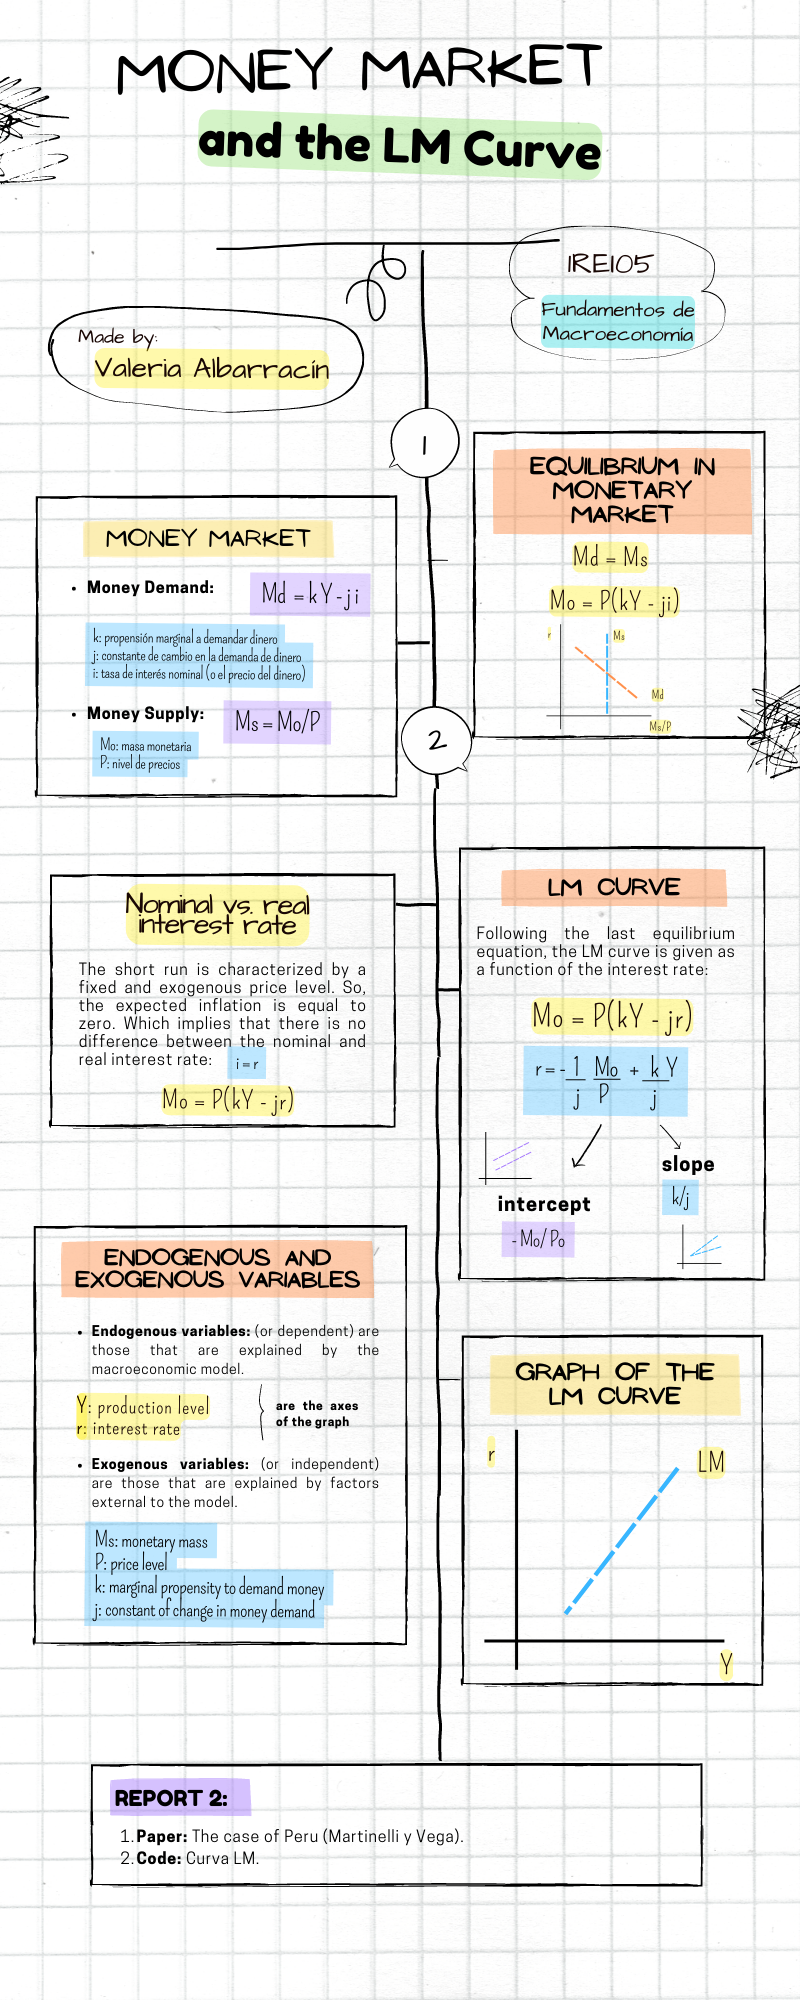

#### 1. Equilibrium in the Monetary Market :

The equilibrium in the Money Market is derived from the equilibrium between Money Supply $(M^s)$ and Money Demand $(M^d)$:

$$ M^s = M^d $$

$$ \frac{M^s}{P} = kY - ji $$

Expected inflation can be assumed to be zero, since in the short run the price level is fixed and exogenous. Therefore, there would not be a big difference between the nominal $(i)$ and the real interest rate $(r)$.

Then, the equation of equilibrium in the money market are:

$$ \frac{M^s}{P} = kY - jr $$


And it can be graphed as follows:

In [2]:
# Parameters

r_size = 100

k = 0.5
j = 0.2                
P  = 10 
Y = 35

r = np.arange(r_size)


    # Equation

def Ms_MD(k, j, P, r, Y):
    Ms_MD = P*(k*Y - j*r)
    return Ms_MD

Ms_MD = Ms_MD(k, j, P, r, Y)

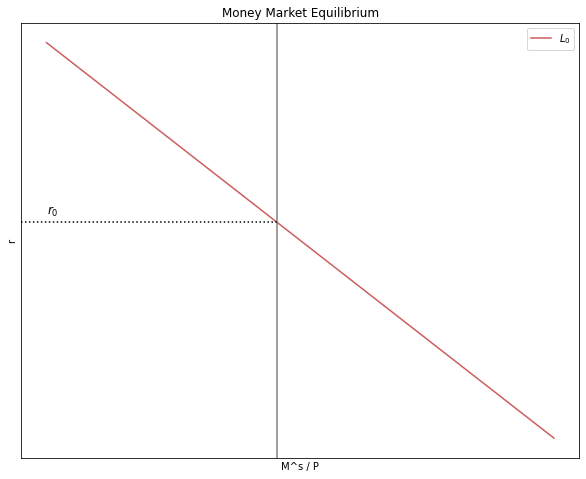

In [3]:
    # Equilibrium in Money Market

fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.set(title="Money Market Equilibrium", xlabel=r'M^s / P', ylabel=r'r')
ax1.plot(Ms_MD, label= '$L_0$', color = '#CD5C5C')

ax1.axvline(x = 45,  ymin= 0, ymax= 1, color = "grey")
ax1.axhline(y=85, xmin= 0, xmax= 0.46, linestyle = ":", color = "black")
ax1.text(0, 89, "$r_0$", fontsize = 12, color = 'black')

ax1.yaxis.set_major_locator(plt.NullLocator())   
ax1.xaxis.set_major_locator(plt.NullLocator())

ax1.legend()

plt.show()

#### 2. LM Curve:

Following the last equilibrium equation, the money market interest rate $(r)$ is equal to:

$$ r = -\frac{1}{j}\frac{M_o^s}{P_o} + \frac{k}{j}Y $$

This is the LM equilibrium equation, where the slope, $\frac{k}{j}$, is positive and the intercept, $ -\frac{M_o^s}{P_o} $,is negative.

And equilibrium LM curve in the Money Market is graphed as follows:

In [4]:
# Parameters
Y_size = 100

k = 10
j = 10                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)


# Equation

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

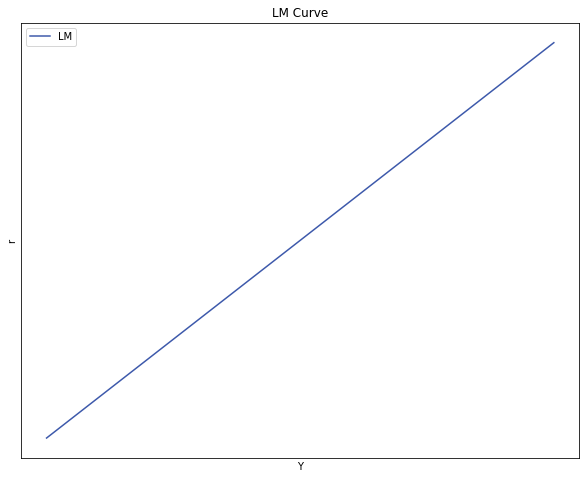

In [5]:
    # Graph

# Dimensins
y_max = np.max(i)
v = [0, Y_size, 0, y_max]   
fig, ax = plt.subplots(figsize=(10, 8))

# Remove the quantities from the axes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Curves to plot
ax.plot(Y, i, label="LM", color = '#3D59AB')

# Title and legend
ax.set(title="LM Curve", xlabel=r'Y', ylabel=r'r')
ax.legend()


plt.show()

#### 3. Derivation of the LM Curve from the Equilibrium in the Money Market:

In [7]:
#1----------------------Equilibrio mercado monetario

    # Parameters
r_size = 100

k = 0.5
j = 0.2                
P  = 10 
Y = 35

r = np.arange(r_size)


    # Ecuación
def Ms_MD(k, j, P, r, Y):
    Ms_MD = P*(k*Y - j*r)
    return Ms_MD

Ms_MD = Ms_MD(k, j, P, r, Y)


    # Nuevos valores de Y
Y1 = 45

def Ms_MD_Y1(k, j, P, r, Y1):
    Ms_MD = P*(k*Y1 - j*r)
    return Ms_MD

Ms_Y1 = Ms_MD_Y1(k, j, P, r, Y1)


Y2 = 25

def Ms_MD_Y2(k, j, P, r, Y2):
    Ms_MD = P*(k*Y2 - j*r)
    return Ms_MD

Ms_Y2 = Ms_MD_Y2(k, j, P, r, Y2)

#2----------------------Curva LM

    # Parameters
Y_size = 100

k = 0.5
j = 0.2                
P  = 10               
Ms = 30            

Y = np.arange(Y_size)


# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

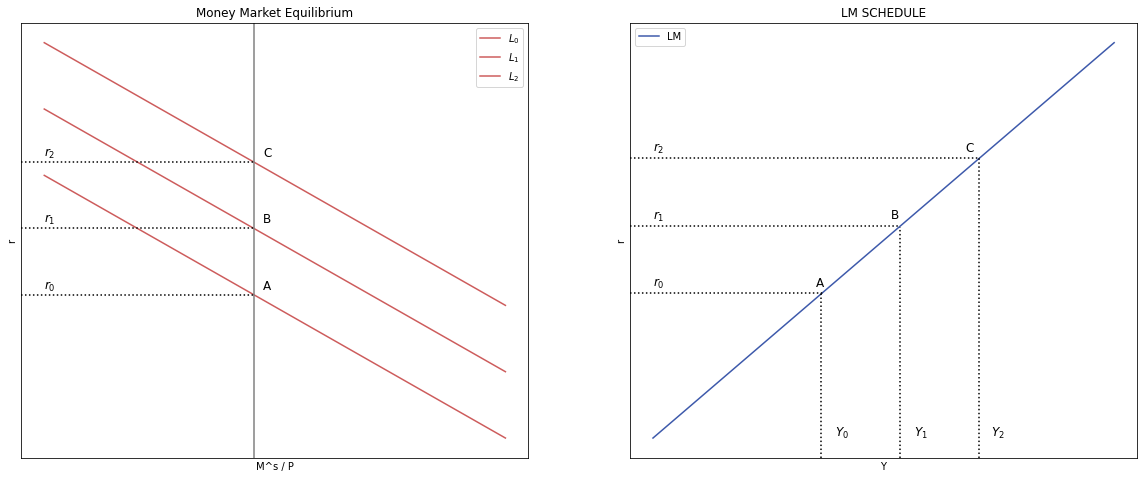

In [8]:
# Gráfico de la derivación de la curva LM a partir del equilibrio en el mercado monetario

    # Dos gráficos en un solo cuadro
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 8)) 


#---------------------------------
    # Gráfico 1: Equilibrio en el mercado de dinero
    
ax1.set(title="Money Market Equilibrium", xlabel=r'M^s / P', ylabel=r'r')
ax1.plot(Y, Ms_MD, label= '$L_0$', color = '#CD5C5C')
ax1.plot(Y, Ms_Y1, label= '$L_1$', color = '#CD5C5C')
ax1.plot(Y, Ms_Y2, label= '$L_2$', color = '#CD5C5C')
ax1.axvline(x = 45,  ymin= 0, ymax= 1, color = "grey")

ax1.axhline(y=35, xmin= 0, xmax= 0.46, linestyle = ":", color = "black")
ax1.axhline(y=135, xmin= 0, xmax= 0.46, linestyle = ":", color = "black")
ax1.axhline(y=85, xmin= 0, xmax= 0.46, linestyle = ":", color = "black")

ax1.text(47, 139, "C", fontsize = 12, color = 'black')
ax1.text(47, 89, "B", fontsize = 12, color = 'black')
ax1.text(47, 39, "A", fontsize = 12, color = 'black')

ax1.text(0, 139, "$r_2$", fontsize = 12, color = 'black')
ax1.text(0, 89, "$r_1$", fontsize = 12, color = 'black')
ax1.text(0, 39, "$r_0$", fontsize = 12, color = 'black')

ax1.yaxis.set_major_locator(plt.NullLocator())   
ax1.xaxis.set_major_locator(plt.NullLocator())

ax1.legend()
 

#---------------------------------
    # Gráfico 2: Curva LM
    
ax2.set(title="LM SCHEDULE", xlabel=r'Y', ylabel=r'r')
ax2.plot(Y, i, label="LM", color = '#3D59AB')

ax2.axhline(y=160, xmin= 0, xmax= 0.69, linestyle = ":", color = "black")
ax2.axhline(y=118, xmin= 0, xmax= 0.53, linestyle = ":", color = "black")
ax2.axhline(y=76, xmin= 0, xmax= 0.38, linestyle = ":", color = "black")

ax2.text(67, 164, "C", fontsize = 12, color = 'black')
ax2.text(51, 122, "B", fontsize = 12, color = 'black')
ax2.text(35, 80, "A", fontsize = 12, color = 'black')

ax2.text(0, 164, "$r_2$", fontsize = 12, color = 'black')
ax2.text(0, 122, "$r_1$", fontsize = 12, color = 'black')
ax2.text(0, 80, "$r_0$", fontsize = 12, color = 'black')

ax2.text(72.5, -14, "$Y_2$", fontsize = 12, color = 'black')
ax2.text(56, -14, "$Y_1$", fontsize = 12, color = 'black')
ax2.text(39, -14, "$Y_0$", fontsize = 12, color = 'black')

ax2.axvline(x=70,  ymin= 0, ymax= 0.69, linestyle = ":", color = "black")
ax2.axvline(x=53,  ymin= 0, ymax= 0.53, linestyle = ":", color = "black")
ax2.axvline(x=36,  ymin= 0, ymax= 0.38, linestyle = ":", color = "black")

ax2.yaxis.set_major_locator(plt.NullLocator())   
ax2.xaxis.set_major_locator(plt.NullLocator())

ax2.legend()

plt.show()

#### 3. Comparative statics:

#### 3.1 Expansionary monetary policy: increase in the Monetary Mass $(M^s)$:

In [6]:
#--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

#--------------------------------------------------
    # NUEVA curva LM

# Definir SOLO el parámetro cambiado
Ms = 700

# Generar la ecuación con el nuevo parámetro
def i_LM_Ms( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms = i_LM_Ms( k, j, Ms, P, Y)

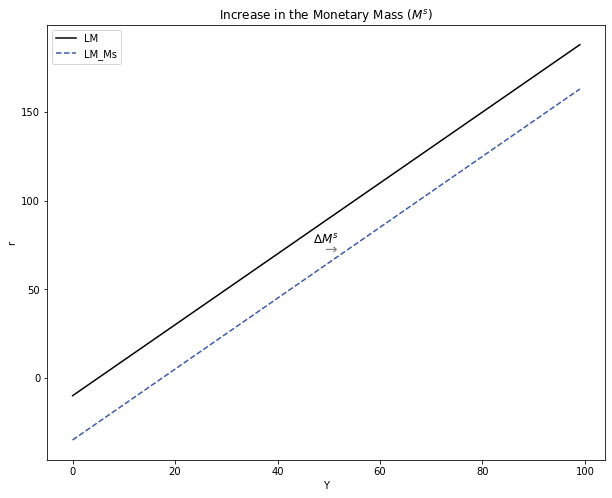

In [8]:
# Dimensiones del gráfico
y_max = np.max(i)
v = [0, Y_size, 0, y_max]   
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, i, label="LM", color = 'black')
ax.plot(Y, i_Ms, label="LM_Ms", color = '#3D59AB', linestyle = 'dashed')

# Texto agregado
plt.text(47, 76, '∆$M^s$', fontsize=12, color='black')
plt.text(49, 70, '→', fontsize=15, color='grey')

# Título y leyenda
ax.set(title = "Increase in the Monetary Mass $(M^s)$", xlabel=r'Y', ylabel=r'r')
ax.legend()


plt.show()
